## Problem 1: Linear Regression
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary
1. Carat -->	Carat weight of the cubic zirconia.
2. Cut -->	Describe the cut quality of the cubic zirconia.   Fair, Good, Very  Good, Premium, Ideal.
3. Color -->	Colour of the cubic zirconia.With D being the  best and J the worst.
4. Clarity -->	refers to the absence of  the Inclusions and Blemishes.                                   (In order from  Best to Worst, FL = flawless, I3= level 3  inclusions) FL, IF, VVS1, VVS2, VS1, VS2,  SI1, SI2, I1, I2, I3
5. Depth -->	The Height of a cubic zirconia, measured from  the Culet to the table, divided by its average  Girdle Diameter.
6. Table -->	The Width of the cubic zirconia's Table  expressed as a Percentage of its Average  Diameter.
7. Price -->	the Price of the cubic zirconia.
8. X 	-->  Length of the cubic zirconia in mm.
9. Y 	-->  Width of the cubic zirconia in mm.
10. Z 	-->  Height of the cubic zirconia in mm.


**Importing Libraries**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Load the dataset**

In [54]:
df=pd.read_csv('cubic_zirconia.csv')

In [55]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Check the shape of the dataset**

In [56]:
df.shape # shape of the dataset

(26967, 11)

**Get the info data types column wise**

In [57]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


**Get the summary statistics of the dataset**

In [58]:
df.describe().T   # numerical fields description

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [59]:
df.describe(include='object').T   # object fields description

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


In [60]:
df.describe(include='all').T   # all fields description in the dataset

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


In [61]:
# checking for duplicates
dups=df.duplicated()
print('Duplicates entries in the given dataset is : ',dups.sum())

Duplicates entries in the given dataset is :  0


### Univariate - Bivariate analysis

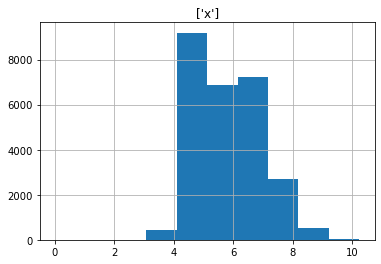

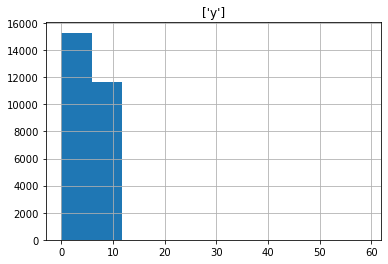

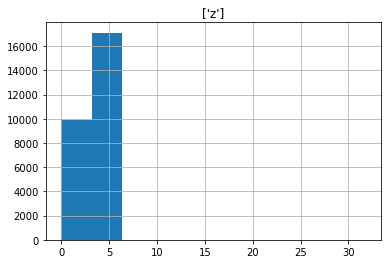

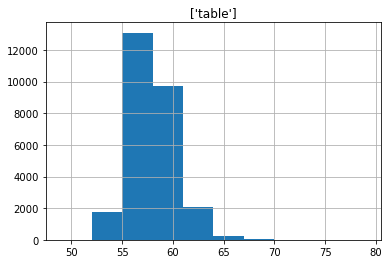

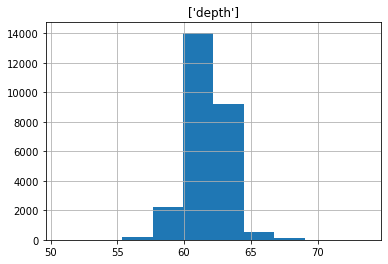

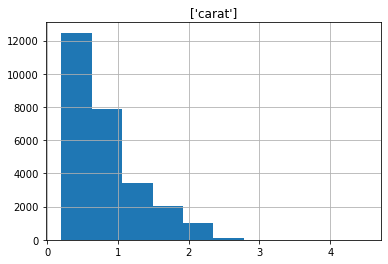

In [62]:
numerical=['x','y','z','table','depth','carat']
for i in numerical:
    plt.title([i])
    df[i].hist()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


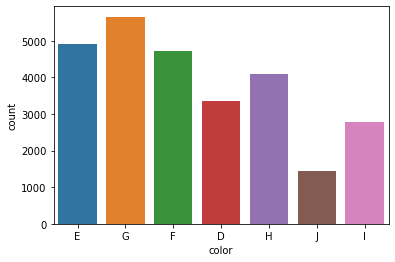

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


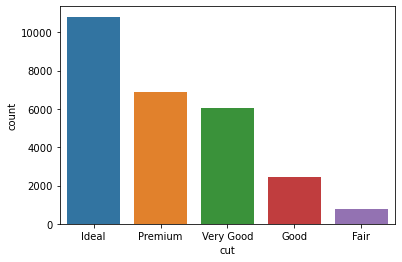

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


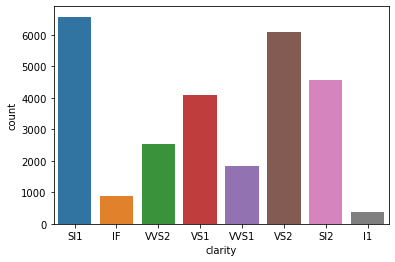

In [63]:
categorical=['color','cut','clarity']
for i in categorical:
    sns.countplot(df[i])
    plt.show()

<AxesSubplot:>

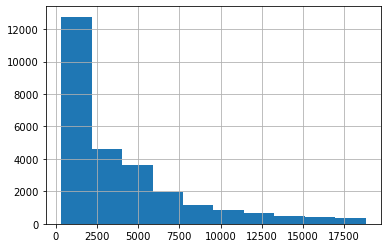

In [64]:
df.price.hist()

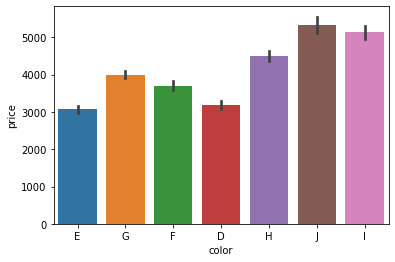

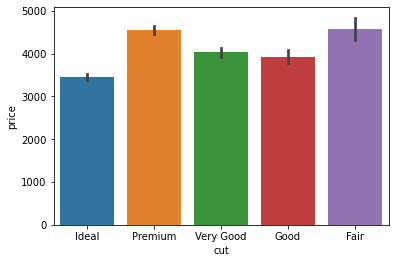

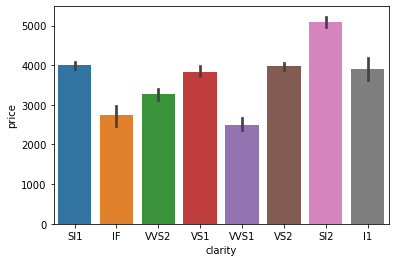

In [65]:
#barplot aginst the price on y-axis
categorical=['color','cut','clarity']
for i in categorical:
    sns.barplot(x=i,y='price', data=df)
    plt.show()

### Check null values

In [66]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [67]:
df['depth'].unique() # finding actual null

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4,  nan,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       61.8, 58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8,
       65.2, 60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8,
       63.6, 63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6,
       70.6, 59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. ,
       54.6, 59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. ,
       66.6, 57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8,
       67.1, 65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2,
       52.7, 56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7,
       53.4, 65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2,
       55.1, 55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8,
       52.2, 53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56

In [68]:
df['depth'].fillna(df.depth.median(), inplace=True) # Imputing nan values with median of the depth which is 61.80

In [69]:
df.depth.isna().sum() #no null values in depth colums

0

In [70]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)  # drop the unnamed : 0 columns which is index not much info

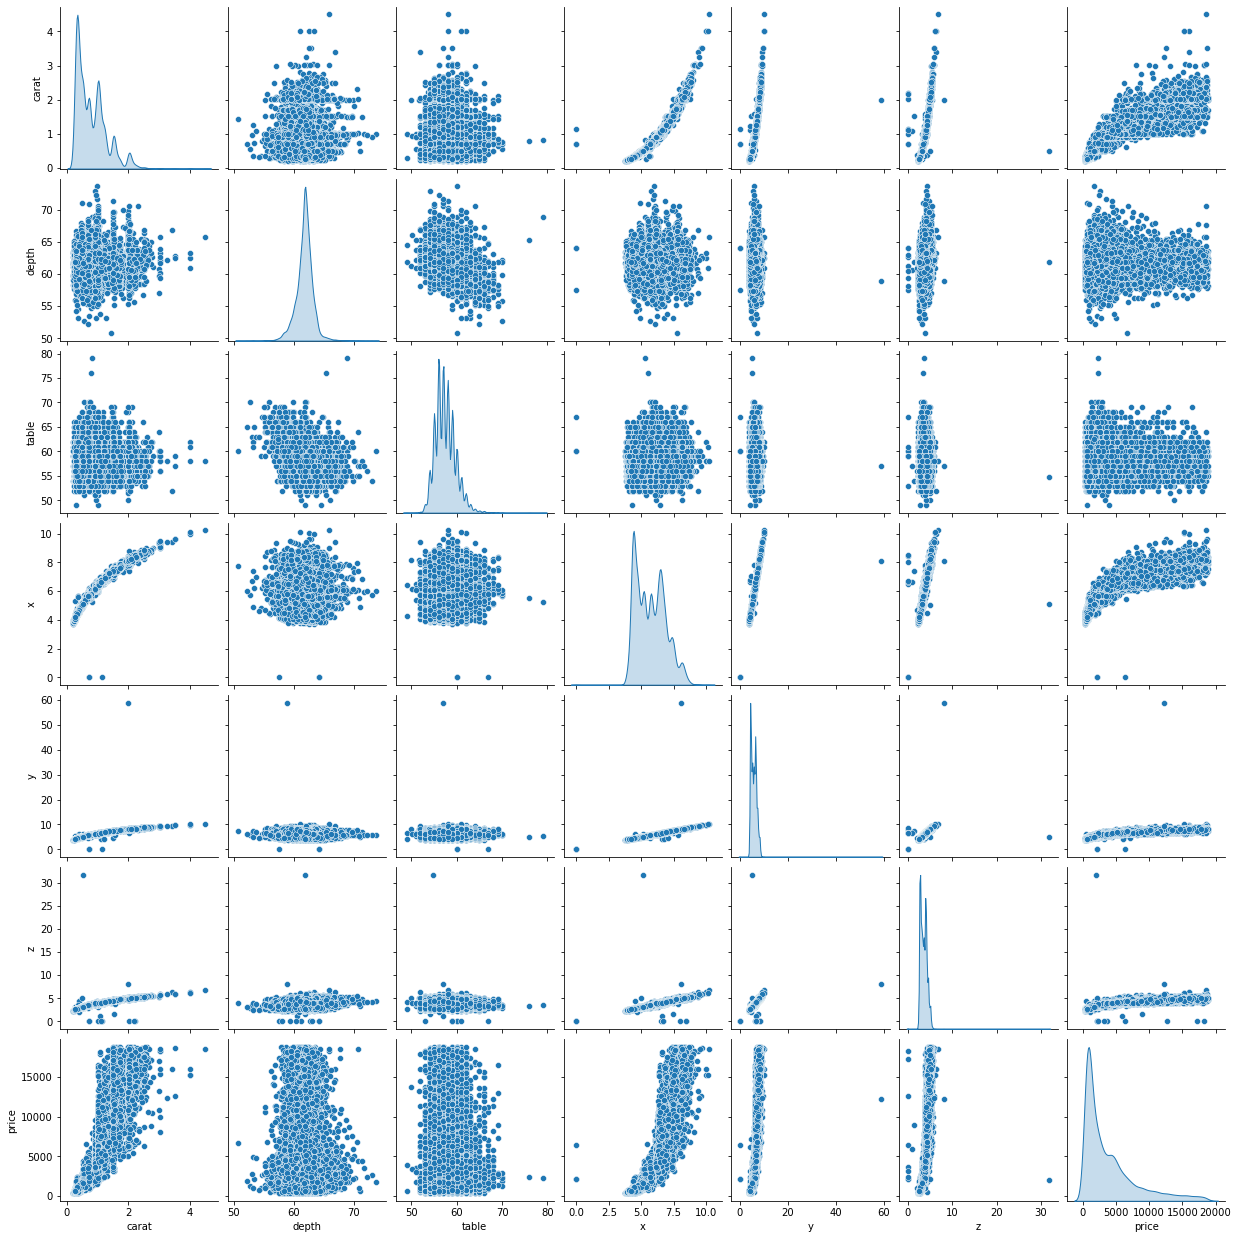

In [71]:
sns.pairplot(df,diag_kind='kde' )

### The 0 values of x, y and z attributes

In [72]:
df[df['x']==0] # dataframe on which values of x = 0

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [73]:
df[df['y']==0] # # dataframe on which values of y= 0

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [74]:
df[df['z']==0] # in this dataframe we have values for x and y to imputing 0 in above dataframe

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [75]:
df[df['z']==0]['x'].mean() # for the values of x =0 we impute it to 4.97

4.977777777777778

In [76]:
df[df['z']==0]['y'].mean() # for the values of y =0 we impute it to 4.94

4.945555555555555

In [77]:
df[df['x']==4.97]['z'].mean() # for the values of z =0 we impute it to 3.08

3.0842105263157893

For 0 values handling of the attributes x, y and z we have new values to impute as

x = 4.97
y = 4.94
z = 3.08

In [78]:
df['x']=np.where(df['x']==0,4.97, df['x'] )
df['y']=np.where(df['y']==0,4.94, df['y'] )
df['z']=np.where(df['z']==0,3.08, df['z'] )

### Encoding ordinal data

In [79]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': has',df[column].nunique(),'Unique categories ')
        print(df[column].value_counts(ascending= False))
        print('\n')

CUT : has 5 Unique categories 
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


COLOR : has 7 Unique categories 
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


CLARITY : has 8 Unique categories 
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64




In [80]:
df['cut'] = df['cut'].str.replace('Fair','1').str.replace('Good','2').str.replace('Very 2','3').str.replace('Premium','4').str.replace('Ideal','5').astype('float')
    
df['color'] = df['color'].str.replace('J','1').str.replace('I','2').str.replace('H','3').str.replace('G','4').str.replace('F','5').str.replace('E','6').str.replace('D','7').astype('float')

df['clarity'] = df['clarity'].str.replace('IF','10').str.replace('VVS1','9').str.replace('VVS2','8').str.replace('VS1','7').str.replace('VS2','6').str.replace('SI1','5').str.replace('SI2','4').str.replace('I1','3').astype('float')

### Checking for outliers

carat         AxesSubplot(0.125,0.125;0.065678x0.755)
cut        AxesSubplot(0.203814,0.125;0.065678x0.755)
color      AxesSubplot(0.282627,0.125;0.065678x0.755)
clarity    AxesSubplot(0.361441,0.125;0.065678x0.755)
depth      AxesSubplot(0.440254,0.125;0.065678x0.755)
table      AxesSubplot(0.519068,0.125;0.065678x0.755)
x          AxesSubplot(0.597881,0.125;0.065678x0.755)
y          AxesSubplot(0.676695,0.125;0.065678x0.755)
z          AxesSubplot(0.755508,0.125;0.065678x0.755)
price      AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

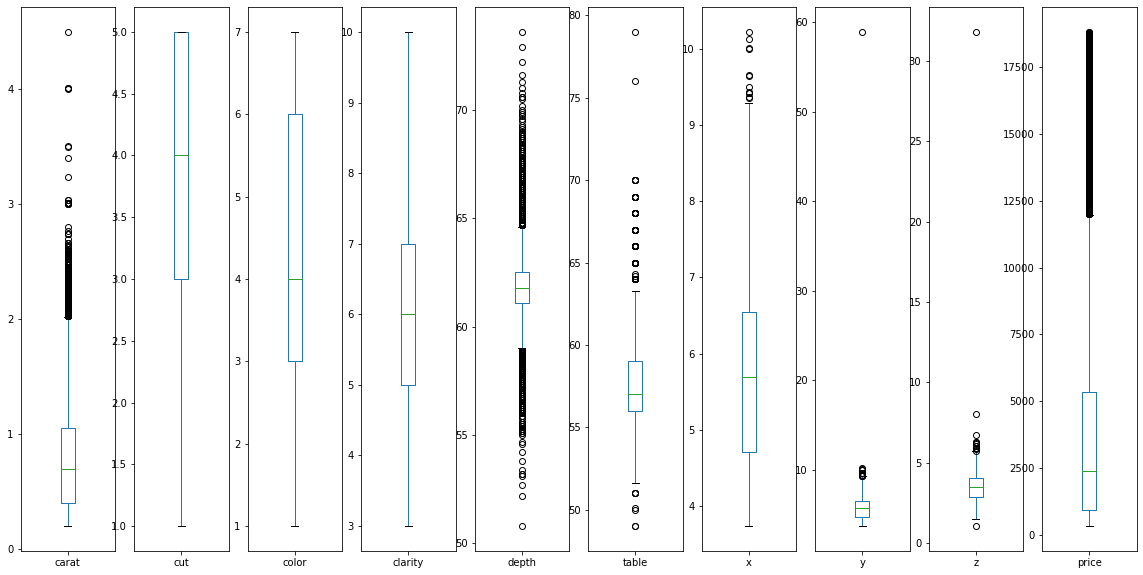

In [81]:
# boxplot of the numerical variable
df.plot(kind='box',subplots=True,figsize=(20,10))

In [82]:
# outlier treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [83]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

carat         AxesSubplot(0.125,0.125;0.065678x0.755)
cut        AxesSubplot(0.203814,0.125;0.065678x0.755)
color      AxesSubplot(0.282627,0.125;0.065678x0.755)
clarity    AxesSubplot(0.361441,0.125;0.065678x0.755)
depth      AxesSubplot(0.440254,0.125;0.065678x0.755)
table      AxesSubplot(0.519068,0.125;0.065678x0.755)
x          AxesSubplot(0.597881,0.125;0.065678x0.755)
y          AxesSubplot(0.676695,0.125;0.065678x0.755)
z          AxesSubplot(0.755508,0.125;0.065678x0.755)
price      AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

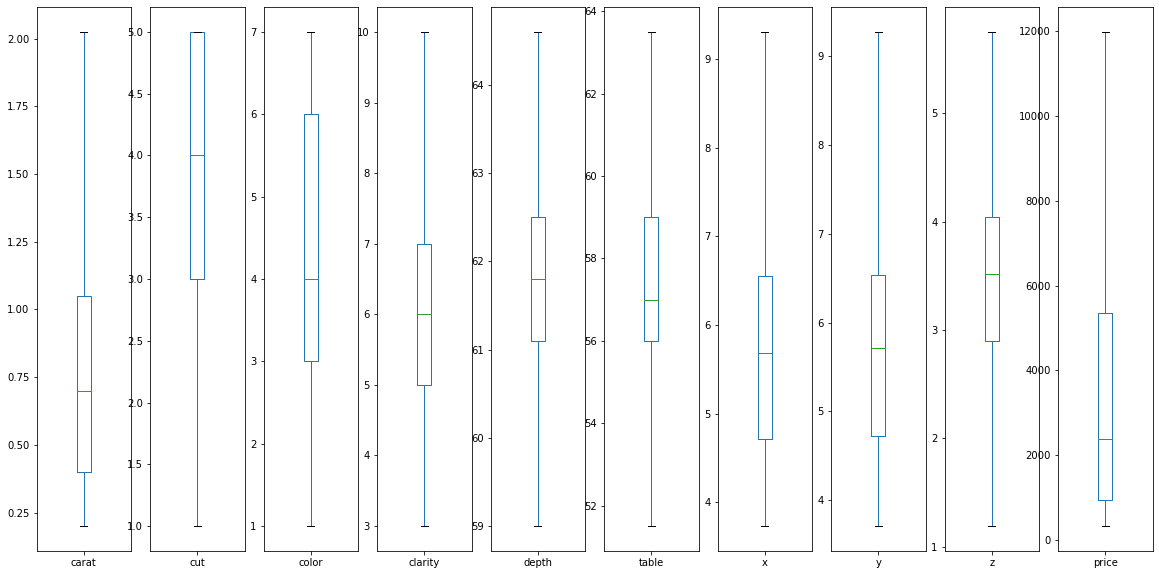

In [84]:
df.plot(kind='box',subplots=True,figsize=(20,10))

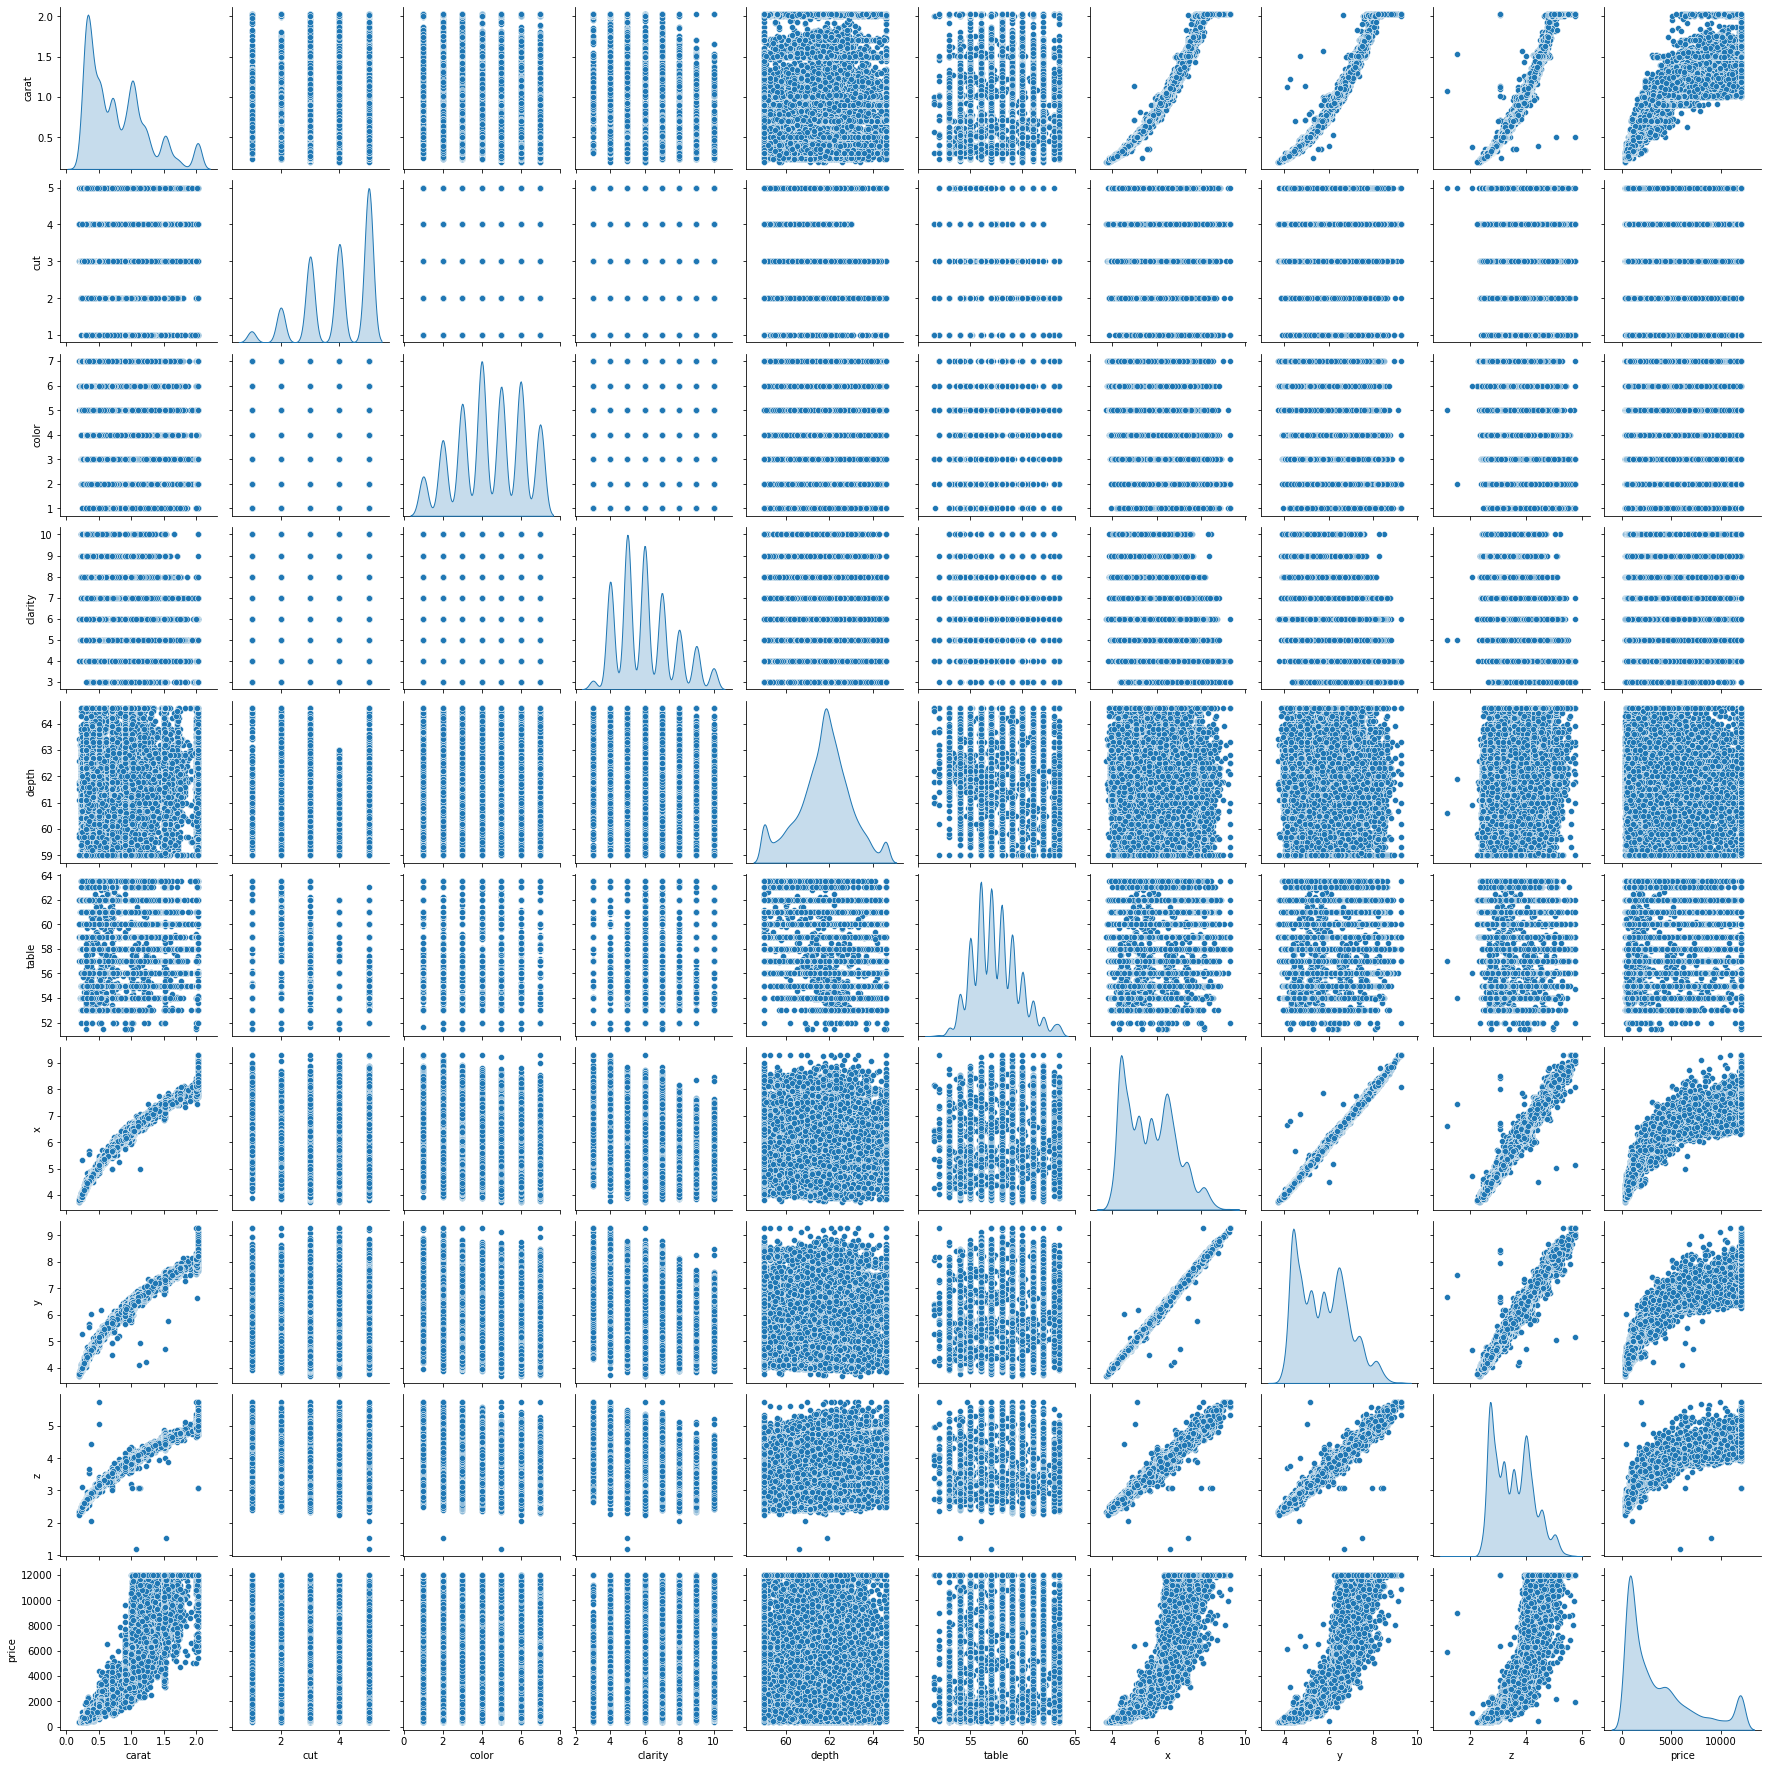

In [85]:
sns.pairplot(df,diag_kind='kde') # pairplot

**Get the Correlation Heatmap**

<AxesSubplot:>

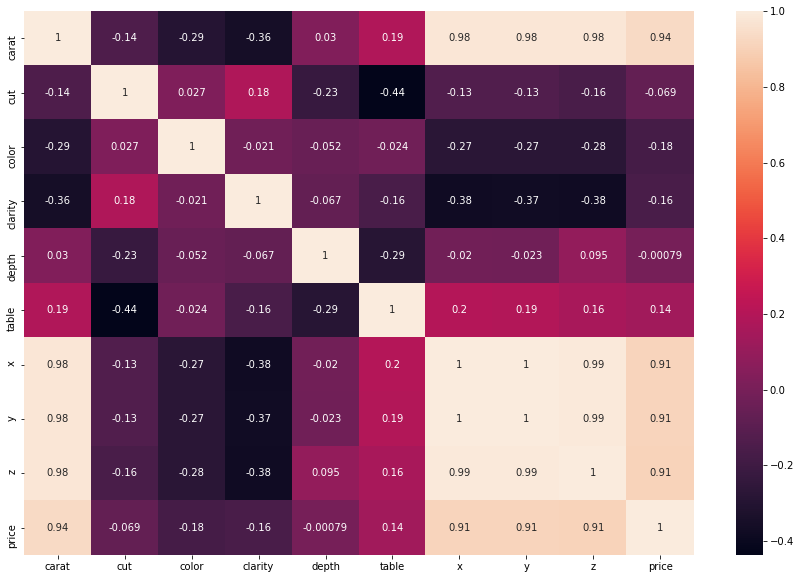

In [86]:
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr, annot=True)

1. carat, x, y and z attributes shows very much positive corelation with the price and each other
2. cut,color, clarity shows the very musch negative corelation with x, y, z
3. cut attribute shwos the -ve relations with the table, tables very much neutral with x,y and z

**Split the dataset**

In [87]:
df1=df.copy()  # use copy of the dataaset for statsmodel after
x = df1.drop(['price'],axis=1)  # indepe.ndant variables
y = df1[['price']] # dependant variable

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

## Using Linear Model from Sci-kit learn library

### Fit the model to the training set

In [105]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()
model.fit(x_train, y_train)  # fitting the model on train set

LinearRegression()

In [108]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for carat is 8885.66164501892
The coefficient for cut is 112.25911705610605
The coefficient for color is 274.0010417769046
The coefficient for clarity is 432.17361093360387
The coefficient for depth is 11.527746343764624
The coefficient for table is -15.381143021902163
The coefficient for x is -1409.4068313910177
The coefficient for y is 1379.2941108679693
The coefficient for z is -579.0180340709605


In [109]:
model.intercept_ # c value of the equation if -ve  then ignore

array([-5173.78562954])

In [95]:
Price = 8885.66*carat + 112.25*cut +   274*color  +  432.17*clarity  +  11.52*depth 
        + (-15.38)*table +  (-1409.40)*x +  1379.29*y +  (-579.01)*z + (#-5173.78)

IndentationError: unexpected indent (<ipython-input-95-025fb13de4ce>, line 2)

Five Top most variables 
1. carat  
2. x   Length of the cubic zirconia in mm.
3. y   Width of the cubic zirconia in mm
4. z   Height of the cubic zirconia in mm.
5. clarity

### Get the score on training set

In [110]:
model.score(x_train, y_train)  # score on train set

0.9317518512113747

### Get the score on test set

In [111]:
model.score(x_test, y_test)  # score on test set

0.9299276838374065

### Get the prediction on test set

In [112]:
y_predict = model.predict(x_test)

### Mean Squared Error

In [113]:
from sklearn import metrics

In [115]:
metrics.r2_score(y_predict,y_test)

0.9251175340824257

In [114]:
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_predict))

Mean Squared Error : 835569.0314764935


### Root Mean Squared Error

In [116]:
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Root Mean Squared Error : 914.0946512678506


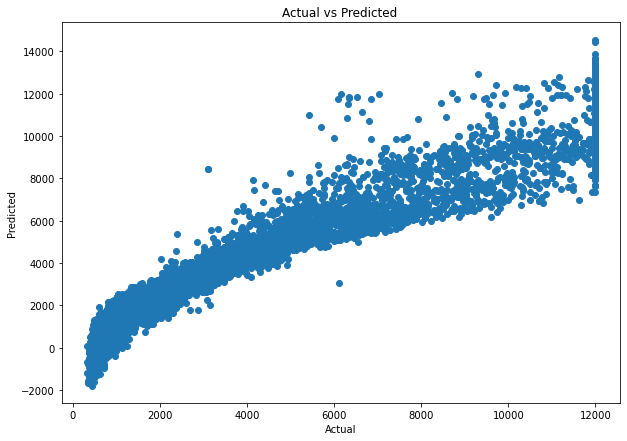

In [117]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_predict)
plt.title('Actual vs Predicted ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Using Stats model

In [118]:
import statsmodels.formula.api as smf


**Make the linear model using OLS**

In [119]:
lm1 = smf.ols(formula= 'price ~ carat + table + cut + color + clarity + depth + x + y + z ', data = df).fit()
lm1.params

Intercept   -6185.206851
carat        8805.171397
table         -12.511075
cut           109.816484
color         274.152200
clarity       436.215069
depth          23.036121
x           -1274.465274
y            1401.361912
z            -783.709501
dtype: float64

**Get the value of coefficient of determination**

In [120]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.057e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:44:06   Log-Likelihood:            -2.2201e+05
No. Observations:               26967   AIC:                         4.440e+05
Df Residuals:                   26957   BIC:                         4.441e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6185.2069    656.960     -9.415      0.000   -7472.882   -4897.531
carat       8805.1714     68.542    128.465      0.000    8670.826    8939.516
table        -12.5111      3.269     -3.827      0.000     -18.919      -6.103
cut          109.8165      6.118     17.949      0.000      97.825     121.808
color        274.1522      3.439     79.723      0.000     267.412     280.892
clarity      436.2151      3.751    116.300      0.000     428.863     443.567
depth         23.0361      8.924      2.582      0.010       5.546      40.527
x          -1274.4653     99.219    -12.845      0.000   -1468.940   -1079.990
y           1401.3619     97.806     14.328      0.000    1209.656    1593.067
z           -783.7095    108.640     -7.214      0.000    -996.649    -570.770
==============================================================================
Omnibus:                     3679.518   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14719.830
Skew:                           0.638   Prob(JB):                         0.00
Kurtosis:                       6.387   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. R^2 and Adj R^2 is 93% which is greater than 80% hence VIF > 5 and evident of savior multicollinearity
2. H0 = there is no reln betn x and y, but p<0.05 hence, we reject the null and proved that there is reln betn x and y

**Get the Predictions on test set**

In [121]:
new_predict = lm1.predict(x_test)

**Calculate MSE for training set**

In [122]:
y_train_pred = lm1.predict(x_train)

In [123]:
print('Mean Squared Error of stats model on train set :', metrics.mean_squared_error(y_train,y_train_pred))

Mean Squared Error of stats model on train set : 826115.2198600041


**Get the RMSE on training set**

In [124]:
print('Root Mean Squared Error of stats model on train set :', np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

Root Mean Squared Error of stats model on train set : 908.9088072298586


**Get the RMSE on test set**

In [125]:
print('Root Mean Squared Error of stats model on train set :', np.sqrt(metrics.mean_squared_error(y_test,new_predict)))

Root Mean Squared Error of stats model on train set : 912.9477976059862


**Check Multi-collinearity using VIF**

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

  multicollinearity does not affect the accuracy of the model but not able to explain the model
 1. VIF  =  1      (no corelation betn x & y)
 2. VIF  =  1 to 5 (moderate collineaity)
 3. VIF  =  > 5    (saviour collinearity)

In [127]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [128]:
i=0
for column in x.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1                           

carat ---> 120.135661163316
cut ---> 17.167417838237228
color ---> 8.528790186562265
clarity ---> 17.74110178414548
depth ---> 1178.7091424485031
table ---> 835.0337895121244
x ---> 10565.652804058127
y ---> 9430.076312342944
z ---> 2919.566878045809
